***
<h1 style="background-color:lightgreen;font-family:newtimeroman;text-align:center;border-radius: 0px 50px">
    <font color=black size=7>
        Análise - Campeonato Brasileiro
    </font>
</h1>

<p>Observação: Em desenvolvimento</p>

***

## Bibliotecas

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Bases de Dados

In [202]:
path = "//Users/felipebarreto/Desktop/Projetos Pessoais/Brasileirão/"

df = pd.read_csv(path + "campeonato-brasileiro-estatisticas-full.csv", sep=";")
times = pd.read_csv(path + "campeonato-brasileiro-full.csv", sep=";")
estados = pd.read_csv(path + "estados.csv", sep=';', encoding='latin-1') ; estados.columns = ['estado','uf','regiao']
temporadas = pd.read_csv(path + "temporadas.csv", sep =';')

In [203]:
for i in [df,times,estados,temporadas]:
    display(i.sample(3))

,ID,Mandante,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
4494,8292,1,21.0,4.0,72%,745.0,90%,10.0,1.0,0.0,1.0,6.0
4439,8260,0,9.0,2.0,51%,418.0,85%,16.0,3.0,0.0,1.0,6.0
508,6293,1,16.0,0.0,48%,423.0,NaN,13.0,1.0,0.0,1.0,7.0


,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
4754,4755,24,2011-09-18,16h00,Domingo,Avaí,Palmeiras,-,Ressacada,1.0,1.0,SC,SP,-
6932,6933,14,2017-07-16,16:00,Domingo,Vasco,Santos,-,Engenhão,0.0,0.0,RJ,SP,-
3456,3457,8,2008-06-29,16h00,Domingo,Cruzeiro,São Paulo,-,Mineirão,1.0,1.0,MG,SP,-


,estado,uf,regiao
19,Rio Grande do Norte,RN,Nordeste
3,Amazonas,AM,Norte
12,Minas Gerais,MG,Sudeste


,temporada,campeao,campeao_prim_turno,qtd_clubes,data_inicio,data_fim,num_partidas
13,temporada_2016,palmeiras,palmeiras,20,2016-05-14,2016-12-11,380
7,temporada_2010,fluminense,fluminense,20,2010-05-08,2010-12-05,380
2,temporada_2005,corinthians,corinthians,22,2005-04-11,2005-12-09,462


In [204]:
## Algumas funções necessárias ##

# transformar string em datetime
def to_time(df, col):
    df[col] = pd.to_datetime(df[col])

# transformação de uma variável em um inteiro
def to_int (df, col):
    df[col] = df[col].str.astype(int)

def str_to_float (df, col):
    df[col] = df[col].str.replace('%', '').astype(float)

# plot dos valores faltantes
def missing_map(df, size_x, size_y, color = 'Reds'):
    plt.figure(figsize=(size_x,size_y))
    plt.title(f"Valores Faltantes em {df.name}", fontweight = 'bold', fontsize = 15)
    ax = sns.heatmap(df.isna().sum().to_frame(), annot = True, fmt = 'd', cmap = color)
    ax.set_ylabel("Variáveis", fontsize=12)
    ax.set_xlabel('Quantidade Faltante', fontsize=12)

# função para transformar as observações em minúsculas
def to_lower(df, col):
    df[col] = df[col].str.lower()

In [205]:
## Ajustes nos datasets ##

# Algumas transformações necessárias
to_time(times, 'Data')
times.Mandante = times.Mandante.replace('athletico-pr','athlético-pr')
times.Visitante = times.Visitante.replace('athletico-pr','athlético-pr')

for i in ['data_inicio', 'data_fim']:
    to_time(temporadas, i)

# colocando para minúsculas (ajuda nas duplicidades)
for i in ['Dia', 'Mandante', 'Visitante','Vencedor', 'Arena','Estado Mandante', 'Estado Visitante', 'Estado Vencedor']:
    to_lower(times, i)

for i in estados.columns:
    to_lower(estados, i)

# renomeando as colunas do dataset
rename_df = {
     'ID': 'id', 
     'Mandante': 'mandante',
     'Chutes': 'chutes', 
     'Chutes a gol': 'chutes_gol', 
     'Posse de bola': 'posse_bola', 
     'Passes': 'passes',
     'Precisão de passe': 'precisao_passes', 
     'Faltas': 'faltas', 
     'Cartões amarelos': 'cartoes_amarelos', 
     'Cartões vermelhos': 'cartoes_vermelhos',
     'Impedimentos': 'impedimentos', 
     'Escanteios': 'escanteios' 
}
df = df.rename(columns = rename_df)

rename_times = {
    'ID': 'id',
    'Rodada': 'rodada',
    'Data': 'data',
    'Horário':'horario',
    'Dia':'dia',
    'Mandante':'mandante',
    'Visitante':'visitante',
    'Vencedor':'vencedor',
    'Arena':'arena',
    'Mandante Placar':'mandante_placar',
    'Visitante Placar':'visitante_placar',
    'Estado Mandante':'estado_mandante',
    'Estado Visitante':'estado_visitante',
    'Estado Vencedor': 'estado_vencedor'
    }
times = times.rename(columns = rename_times)

# retirando o símbolo de % e transformando em float
for i in ['posse_bola','precisao_passes']:
    str_to_float(df, i)
    
# filtrando somente os josgos de 2003 em diante (pontos corridos) --> Temporadas de 2003 a 2020
times = times[(times.data >= '2003-03-29') & (times.data <= '2019-12-08')]

# Dando nomes aos datasets
df.name = 'df'; times.name = 'times'; estados.name = 'estados'

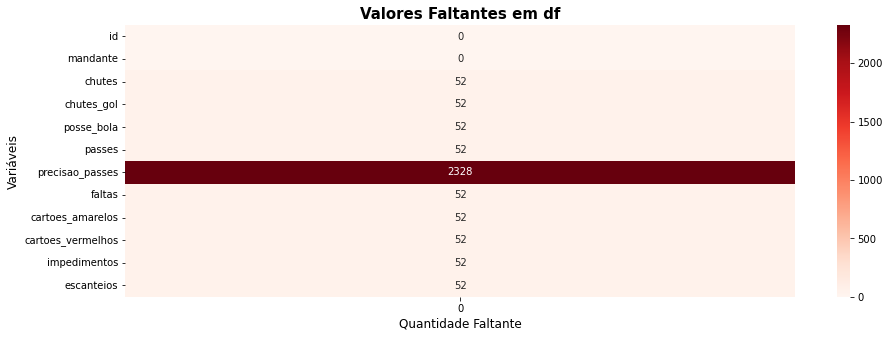

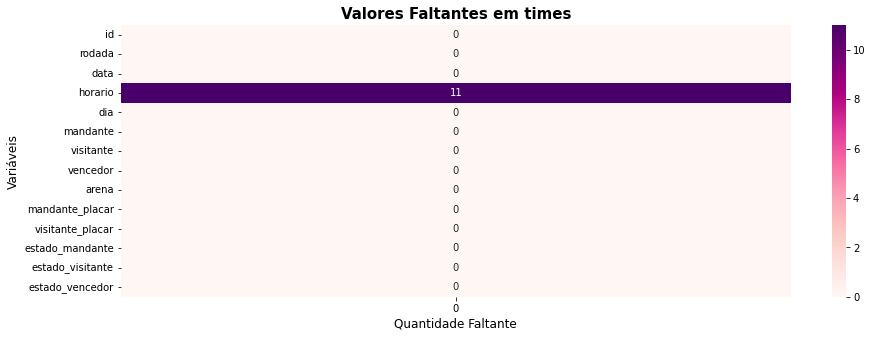

In [206]:
# verificando valores faltantes
missing_map(df, 15, 5)
missing_map(times, 15, 5, color="RdPu") 

In [207]:
for i in [df,times,estados,temporadas]:
    display(i.sample(3))

,id,mandante,chutes,chutes_gol,posse_bola,passes,precisao_passes,faltas,cartoes_amarelos,cartoes_vermelhos,impedimentos,escanteios
3374,7728,1,26.0,10.0,61.0,509.0,88.0,14.0,3.0,0.0,0.0,12.0
377,6228,0,11.0,0.0,31.0,282.0,NaN,18.0,0.0,0.0,1.0,4.0
4319,8201,0,13.0,2.0,64.0,519.0,86.0,14.0,3.0,0.0,0.0,4.0


,id,rodada,data,horario,dia,mandante,visitante,vencedor,arena,mandante_placar,visitante_placar,estado_mandante,estado_visitante,estado_vencedor
2812,2813,20,2006-08-27,18h10,domingo,fortaleza,botafogo-rj,botafogo-rj,castelão,2.0,3.0,ce,rj,rj
3013,3014,2,2007-05-19,18h10,sábado,athlético-pr,internacional,athlético-pr,kyocera arena,2.0,1.0,pr,rs,pr
4844,4845,33,2011-11-06,17h00,domingo,avaí,ceará,ceará,ressacada,1.0,2.0,sc,ce,ce


,estado,uf,regiao
11,mato grosso do sul,ms,centro-oeste
13,par,pa,norte
5,cear,ce,nordeste


,temporada,campeao,campeao_prim_turno,qtd_clubes,data_inicio,data_fim,num_partidas
11,temporada_2014,cruzeiro,cruzeiro,20,2014-04-19,2014-12-07,380
13,temporada_2016,palmeiras,palmeiras,20,2016-05-14,2016-12-11,380
15,temporada_2018,palmeiras,são paulo,20,2018-04-14,2018-12-02,380


In [208]:
times_todos = np.unique(
    np.concatenate([times.mandante.unique(), 
                    times.visitante.unique()]))

times_todos

array(['américa-mg', 'américa-rn', 'athlético-pr', 'atlético-go',
       'atlético-mg', 'avaí', 'bahia', 'barueri', 'botafogo-rj',
       'brasiliense', 'ceará', 'chapecoense', 'corinthians', 'coritiba',
       'criciúma', 'cruzeiro', 'csa', 'figueirense', 'flamengo',
       'fluminense', 'fortaleza', 'goiás', 'grêmio', 'grêmio prudente',
       'guarani', 'internacional', 'ipatinga', 'joinville', 'juventude',
       'náutico', 'palmeiras', 'paraná', 'paysandu', 'ponte preta',
       'portuguesa', 'santa cruz', 'santo andré', 'santos', 'sport',
       'são caetano', 'são paulo', 'vasco', 'vitória'], dtype=object)

In [209]:
ufs = np.array(estados.uf)
ufs

array(['ac', 'al', 'ap', 'am', 'ba', 'ce', 'df', 'es', 'go', 'ma', 'mt',
       'ms', 'mg', 'pa', 'pb', 'pr', 'pe', 'pi', 'rj', 'rn', 'rs', 'ro',
       'rr', 'sc', 'sp', 'se', 'to'], dtype=object)

#### <font color='red'>Validando os datasets</font>

In [210]:
# quantidade de partidas por temporada
times.head(3)

,id,rodada,data,horario,dia,mandante,visitante,vencedor,arena,mandante_placar,visitante_placar,estado_mandante,estado_visitante,estado_vencedor
1053,1054,1,2003-03-29,16h00,sábado,athlético-pr,grêmio,athlético-pr,arena da baixada,2.0,0.0,pr,rs,pr
1054,1055,1,2003-03-29,16h00,sábado,guarani,vasco,guarani,brinco de ouro,4.0,2.0,sp,rj,sp
1055,1056,1,2003-03-30,16h00,domingo,fortaleza,bahia,-,castelão,0.0,0.0,ce,ba,-


In [211]:
temporadas.head(3)

,temporada,campeao,campeao_prim_turno,qtd_clubes,data_inicio,data_fim,num_partidas
0,temporada_2003,cruzeiro,cruzeiro,24,2003-03-29,2003-12-14,552
1,temporada_2004,santos,santos,24,2004-04-21,2004-12-19,552
2,temporada_2005,corinthians,corinthians,22,2005-04-11,2005-12-09,462


In [212]:
## Acescentando uma coluna que representa a temporada que é de cada partida
times['temporada'] = times.data.dt.year
for i in range(times.shape[0]):
    for j in range(temporadas.shape[0]):
        if (np.array(times.data[i:i+1]) >= np.array(temporadas.data_inicio[j:j+1])) and (np.array(times.data[i:i+1]) <= np.array(temporadas.data_fim[j:j+1])):
             times['temporada'][i:i+1] =  temporadas.temporada[j:j+1]

In [213]:
## validando a base com as quantidades de jogos
pd.DataFrame(times.groupby("temporada").id.count()).reset_index().\
    merge(temporadas[["temporada","num_partidas"]], on="temporada", how="inner")

,temporada,id,num_partidas
0,temporada_2003,552,552
1,temporada_2004,552,552
2,temporada_2005,462,462
3,temporada_2006,380,380
4,temporada_2007,383,380
5,temporada_2008,377,380
6,temporada_2009,380,380
7,temporada_2010,380,380
8,temporada_2011,380,380
9,temporada_2012,380,380


O que se verificaca que há divergência em 3 temporadas
- 2007 com 3 jogos a mais
- 2008 com 3 jogos a menos
- 2020 faltando 10 jogos

Quais são esses três jogos doferentes?

In [214]:
## tem 3 jogos errados em 2007, verificar quais são
times[(np.array(times.data) >= np.array(temporadas.query("temporada == 'temporada_2007'").data_inicio)) & 
      (np.array(times.data) <= np.array(temporadas.query("temporada == 'temporada_2007'").data_fim))].\
    sort_values(by = ['data']).groupby(["mandante"]).mandante.count()

mandante
américa-rn       19
athlético-pr     19
atlético-mg      19
botafogo-rj      19
corinthians      19
cruzeiro         20
figueirense      19
flamengo         19
fluminense       19
goiás            19
grêmio           19
internacional    19
juventude        19
náutico          19
palmeiras        19
paraná           19
santos           19
sport            20
são paulo        19
vasco            20
Name: mandante, dtype: int64

Vemos que os jogos a mais são:
- cruzeiro, sport e vasco

In [215]:
## tem 3 jogos errados em 2007, verificar quais são
times[(np.array(times.data) >= np.array(temporadas.query("temporada == 'temporada_2007'").data_inicio)) & 
      (np.array(times.data) <= np.array(temporadas.query("temporada == 'temporada_2007'").data_fim))].\
    sort_values(by = ['data']).groupby(["visitante"]).visitante.count()

visitante
américa-rn       19
athlético-pr     19
atlético-mg      19
botafogo-rj      20
corinthians      19
cruzeiro         19
figueirense      19
flamengo         19
fluminense       19
goiás            19
grêmio           19
internacional    19
juventude        19
náutico          19
palmeiras        19
paraná           19
portuguesa        1
santos           19
sport            19
são paulo        19
vasco            19
vitória           1
Name: visitante, dtype: int64

Ajuste nos jogos abaixo:

- VITÓRIA não jogou a série A em 2007
- PORTUGUESA não jogou a série A em 2007

In [216]:
times[(times.temporada == 'temporada_2007') & 
      ((times.visitante == 'vitória') | (times.visitante == 'portuguesa'))]

,id,rodada,data,horario,dia,mandante,visitante,vencedor,arena,mandante_placar,visitante_placar,estado_mandante,estado_visitante,estado_vencedor,temporada
3009,3010,2,2007-05-17,18h10,sábado,sport,vitória,-,ilha do retiro,0.0,0.0,pe,es,-,temporada_2007
3011,3012,2,2007-05-17,18h10,sábado,vasco,portuguesa,vasco,são januário,3.0,1.0,rj,sp,rj,temporada_2007


Pela lógica, o 3º jogo a ser retirado da temporada de 2007 e colocada na temporada de 2008 é o de <b>cruzeiro x botafogo-rj</b>

In [217]:
times[(times.temporada == 'temporada_2007') & (times.mandante == 'cruzeiro') & (times.visitante == 'botafogo-rj')]

,id,rodada,data,horario,dia,mandante,visitante,vencedor,arena,mandante_placar,visitante_placar,estado_mandante,estado_visitante,estado_vencedor,temporada
3010,3011,2,2007-05-17,18h10,sábado,cruzeiro,botafogo-rj,cruzeiro,mineirão,1.0,0.0,mg,rj,mg,temporada_2007
3145,3146,15,2007-07-29,18h10,domingo,cruzeiro,botafogo-rj,cruzeiro,mineirão,3.0,2.0,mg,rj,mg,temporada_2007


In [218]:
times.id.nunique() == times.id.count() ## ou seja, não há valores repetidos para as partidas

True

Por uma breve pesquisa, percebe-se que os três jogos que pertencem à temporada de 2008 são os jogos com id:
- 3010, 3011, 3012

In [219]:
## Ajustando os três jogos a mais de 2007 para 2008
for i in [3010,3011,3012]:
    times.loc[times.id == i, "temporada"] =  'temporada_2008'

In [220]:
times.loc[times.id == 3010]

,id,rodada,data,horario,dia,mandante,visitante,vencedor,arena,mandante_placar,visitante_placar,estado_mandante,estado_visitante,estado_vencedor,temporada
3009,3010,2,2007-05-17,18h10,sábado,sport,vitória,-,ilha do retiro,0.0,0.0,pe,es,-,temporada_2008


In [221]:
# verificando
pd.DataFrame(times.groupby("temporada").id.count()).reset_index().\
    merge(temporadas[["temporada","num_partidas"]], on="temporada", how="inner")

,temporada,id,num_partidas
0,temporada_2003,552,552
1,temporada_2004,552,552
2,temporada_2005,462,462
3,temporada_2006,380,380
4,temporada_2007,380,380
5,temporada_2008,380,380
6,temporada_2009,380,380
7,temporada_2010,380,380
8,temporada_2011,380,380
9,temporada_2012,380,380


## Criando uma função para ver as estatísticas

In [259]:
def stats_team(time_escolhido, uf):
    time = times[times.data.dt.year > 2002] # Só a partir de 2002 (pontos corridos)
    time = time[(time['mandante'] == time_escolhido) | (time['visitante'] == time_escolhido)]
    
    ganhou = time[time.vencedor == time_escolhido]
    total_temporadas = len(times[pd.to_datetime(times.data).dt.year > 2002].data.dt.year.unique() - 1)
    total_temporadas_time = len(time.data.dt.year.unique() - 1)

    print("\n\n>>>   Algumas estatísticas sobre o time {}   <<<\n\n"
        "- Número de vitórias do time nas temporadas: {}\n"\
        "- Percentual de vitórias por temporada: {}%\n\n"\
        "- Número de empates do time nas temporadas: {}\n"\
        "- Percentual de empates por temporada: {}%\n\n"\
        "- Número de derrotas do time nas temporadas: {}\n"\
        "- Percentual de derrotas por temporada: {}%\n\n"\
        "- Temporadas dem que o time ficou na 1º divisão: {}\n"\
        "- De {} temporadas da Série A, participou de {} temporadas. Ou seja, de {}%\n\n"\
        .format(pd.Series([time_escolhido]).str.title()[0],
                time[time['estado_vencedor'] == uf].id.count(),
                round((100 * time[time['estado_vencedor'] == UF].id.count() / time.id.count()), 2),
                time[(time['estado_vencedor'] == '-')].id.count(),
                round((100 * time[time['estado_vencedor'] == '-'].id.count() / time.id.count()), 2),
                time[(time['estado_vencedor'] != uf) & (time['estado_vencedor'] != '-')].id.count(),
                round((100 * time[(time['estado_vencedor'] != uf) & (time['estado_vencedor'] != '-')].id.count() / time.id.count()), 2),
                ganhou.data.dt.year.unique(),
                total_temporadas, total_temporadas_time, round((100*total_temporadas_time / total_temporadas), 2)
            )
    )

# estatística sobre o time
print(
    "---*---*---*---*---*---*---*---*---*---*---*---*---*---*---\n                   "
    "AVALIAÇÃO DO SEU TIME!\n---*---*---*---*---*---*---*---*---*---*---*---*---*---*---\n")
time_escolhido = input("\nQual o time que deseja avaliar?\n>> Time: ").lower()
assert time_escolhido in times_todos, f"Coloque um dos times que ja participaram do Brasileirão\n {sorted(times_todos)}"
UF = input("\nQual a UF do time escolhido?\n>> UF: ").lower()
assert UF in ufs, f"Coloque um estado válido\n {sorted(estados.uf)}"
print("\n............................................................")
stats_team(time_escolhido, UF)                                      

# looping
continuar = input("---*---*---*---*---*---*---*---*---*---*---*---*---*---*---\n\n"
"Deseja ver outro time?\nResposta: ")
assert continuar in ("s","sim","S","Sim","yes","Yes","y","Y"), "Sim ou não!"
while continuar in ("s","sim","S","Sim","yes","Yes","y","Y"):
    time_escolhido = input("\nQual o time que deseja avaliar?\n>> Time: ").lower()
    assert time_escolhido in times_todos, f"Coloque um dos times que ja participaram do Brasileirão\n {sorted(times_todos)}"
    UF = input("\nQual a UF do time escolhido?\n>> UF: ").lower()
    assert UF in ufs, f"Coloque um estado válido\n {sorted(estados.uf)}"
    print("\n---.---.---.---.---.---.---.---.---.---.---.---.---.---.---")
    stats_team(time_escolhido, UF)
    continuar = input("---*---*---*---*---*---*---*---*---*---*---*---*---*---*---\n\n"
    "Deseja ver outro time?\n\nResposta: ")
    assert continuar in ("s","sim","S","Sim","yes","Yes","y","Y"), "Sim ou não!"

---*---*---*---*---*---*---*---*---*---*---*---*---*---*---
                   AVALIAÇÃO DO SEU TIME!
---*---*---*---*---*---*---*---*---*---*---*---*---*---*---




Qual o time que deseja avaliar?
>> Time:  ceará

Qual a UF do time escolhido?
>> UF:  ce



............................................................


>>>   Algumas estatísticas sobre o time Ceará   <<<

- Número de vitórias do time nas temporadas: 59
- Percentual de vitórias por temporada: 29.21%

- Número de empates do time nas temporadas: 65
- Percentual de empates por temporada: 32.18%

- Número de derrotas do time nas temporadas: 78
- Percentual de derrotas por temporada: 38.61%

- Temporadas dem que o time ficou na 1º divisão: [2010 2011 2018 2019 2020 2021]
- De 19 temporadas da Série A, participou de 6 temporadas. Ou seja, de 31.58%




---*---*---*---*---*---*---*---*---*---*---*---*---*---*---

Deseja ver outro time?
Resposta:  t


AssertionError: Sim ou não!

### Questionamentos (Será desenvolvido)

- O time teve melhor desempenho em casa ou fora de casa?
- Quais as chances de o time ganhar em casa?
- 

In [ ]:
display(
    times.head(),
    df.head()
)

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,1,2000-07-29,16h00,sábado,fluminense,bahia,fluminense,maracanã,2.0,0.0,rj,ba,rj
1,2,1,2000-07-29,16h00,sábado,vasco,sport,sport,são januário,0.0,2.0,rj,pe,pe
2,3,1,2000-07-29,16h00,sábado,vitória,palmeiras,vitória,barradão,4.0,1.0,es,sp,es
3,4,1,2000-07-30,17h00,domingo,botafogo-rj,atlético-mg,-,caio martins,0.0,0.0,rj,mg,-
4,5,1,2000-07-30,18h30,domingo,juventude,flamengo,-,alfredo jaconi,1.0,1.0,rs,rj,-


,ID,Mandante,Chutes,Chutes a gol,Posse de bola,Passes,Precisão de passe,Faltas,Cartões amarelos,Cartões vermelhos,Impedimentos,Escanteios
0,6041,1,13.0,0.0,45%,326.0,NaN,20.0,2.0,0.0,3.0,3.0
1,6041,0,16.0,0.0,55%,388.0,NaN,21.0,2.0,0.0,0.0,5.0
2,6040,1,17.0,0.0,50%,406.0,NaN,20.0,2.0,0.0,2.0,11.0
3,6040,0,10.0,0.0,50%,426.0,NaN,14.0,4.0,0.0,4.0,2.0
4,6042,1,26.0,11.0,74%,702.0,NaN,9.0,2.0,0.0,1.0,5.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 4806 non-null   int64  
 1   Mandante           4806 non-null   int64  
 2   Chutes             4754 non-null   float64
 3   Chutes a gol       4754 non-null   float64
 4   Posse de bola      4754 non-null   object 
 5   Passes             4754 non-null   float64
 6   Precisão de passe  2478 non-null   object 
 7   Faltas             4754 non-null   float64
 8   Cartões amarelos   4754 non-null   float64
 9   Cartões vermelhos  4754 non-null   float64
 10  Impedimentos       4754 non-null   float64
 11  Escanteios         4754 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 450.7+ KB


Index(['ID', 'Mandante', 'Chutes', 'Chutes a gol', 'Posse de bola', 'Passes',
       'Precisão de passe', 'Faltas', 'Cartões amarelos', 'Cartões vermelhos',
       'Impedimentos', 'Escanteios'],
      dtype='object')

In [ ]:
df['Precisão de passe'].value_counts()

82%    208
84%    184
85%    174
81%    169
86%    162
83%    159
80%    154
87%    143
78%    127
79%    123
77%    114
88%    103
75%     90
76%     82
72%     64
89%     63
73%     57
74%     50
71%     41
90%     35
70%     31
69%     28
68%     22
65%     16
91%     14
67%     14
66%     10
62%      8
64%      8
92%      6
61%      5
63%      4
60%      3
57%      2
59%      2
51%      1
56%      1
93%      1
Name: Precisão de passe, dtype: int64